## Contents
* [1. EDA: Google Trends](#1.-EDA:-Google-Trends)
* [2. Read & Clean Data](#2.-Read-&-Clean-Data)
* [3. Export Data](#3.-Export-Data)

---
## 1. EDA: Google Trends
---
- To explore the trends of Google search terms 'dengue symptoms', 'dengue fever', 'dengue how', 'dengue mosquito', 'mosquito bite' in Singapore from 2013 to 2020. 
- These terms were created by our team by assuming the role of a just-infected person looking for help / resource through Google.
- Data is extracted from [Google Trends](https://trends.google.com/trends/explore?cat=45&date=2013-01-01%202020-12-31&geo=SG&q=dengue%20symptoms,dengue%20fever,dengue%20how,dengue%20mosquito,mosquito%20bite).

---
## 2. Read & Clean Data
---

### Import

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Read CSV

In [5]:
google_df = pd.read_csv('assets/input/dengue_googletrend.csv')
print(google_df.shape)
print(google_df.head())
print(google_df.info())

(120, 6)
     Month  dengue symptoms: (Singapore)  dengue fever: (Singapore)  \
0  2013-01                            11                         20   
1  2013-02                            20                         35   
2  2013-03                            13                         26   
3  2013-04                            40                         50   
4  2013-05                            47                         54   

   dengue how: (Singapore)  dengue mosquito: (Singapore)  \
0                        2                             0   
1                        3                             6   
2                        2                             4   
3                        4                            14   
4                        5                            10   

   mosquito bite: (Singapore)  
0                           4  
1                           4  
2                           6  
3                           7  
4                           3  
<class 'pan

### Set date as index

In [6]:
# change column names
google_df.rename(columns={'Month':'date',
                          'dengue symptoms: (Singapore)': 'dengue symptoms',
                          'dengue fever: (Singapore)': 'dengue fever',
                          'dengue how: (Singapore)': 'dengue how',
                          'dengue mosquito: (Singapore)': 'dengue mosquito',
                          'mosquito bite: (Singapore)': 'mosquito bite',
                         },inplace=True)
print(google_df.columns)

# change 'date' to datetime format
google_df['date'] = pd.to_datetime(google_df['date'], format='%Y-%m')
print(google_df.head())

# set 'date' as index
google_df.set_index('date', inplace=True)
google_df.sort_index()
print(google_df.head())

Index(['date', 'dengue symptoms', 'dengue fever', 'dengue how',
       'dengue mosquito', 'mosquito bite'],
      dtype='object')
        date  dengue symptoms  dengue fever  dengue how  dengue mosquito  \
0 2013-01-01               11            20           2                0   
1 2013-02-01               20            35           3                6   
2 2013-03-01               13            26           2                4   
3 2013-04-01               40            50           4               14   
4 2013-05-01               47            54           5               10   

   mosquito bite  
0              4  
1              4  
2              6  
3              7  
4              3  
            dengue symptoms  dengue fever  dengue how  dengue mosquito  \
date                                                                     
2013-01-01               11            20           2                0   
2013-02-01               20            35           3                6   
201

### EDA

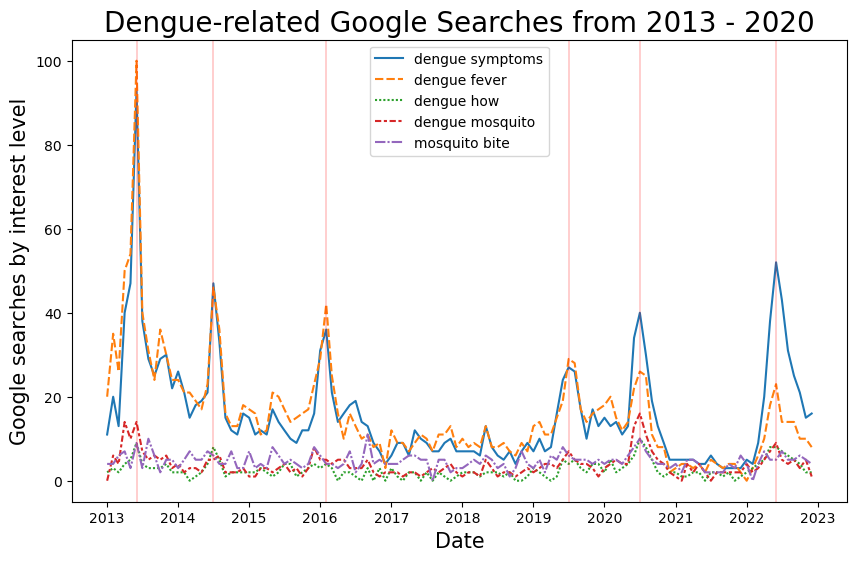

In [11]:
plt.figure(figsize=(10,6))
plt.title("Dengue-related Google Searches from 2013 - 2020", size= 20)
plt.xlabel("Date", size = 15)
plt.ylabel("Google searches by interest level", size=15)

g = sns.lineplot(google_df)

# draw vertical lines reference for search peaks
g.axvline(pd.to_datetime('2013-06-01'), linewidth=0.3, color=(1, 0, 0, 0.9))
g.axvline(pd.to_datetime('2014-07-01'), linewidth=0.3, color=(1, 0, 0, 0.9))
g.axvline(pd.to_datetime('2016-02-01'), linewidth=0.3, color=(1, 0, 0, 0.9))
g.axvline(pd.to_datetime('2019-07-01'), linewidth=0.3, color=(1, 0, 0, 0.9))
g.axvline(pd.to_datetime('2020-07-01'), linewidth=0.3, color=(1, 0, 0, 0.9))
g.axvline(pd.to_datetime('2022-06-01'), linewidth=0.3, color=(1, 0, 0, 0.9))

### Analysis

There were 5 observable peaks in the abovementioned dengue-related Google search terms between 2013 and 2020 (highlighted by vertical faint-red lines). Each of them coincided with a major outbreak of dengue in Singapore (described below). 

However, the interest levels of the Google search terms were not in tandem with the severity level of dengue outbreaks (i.e. in 2013, the google search term 'dengue symptoms' and 'dengue fever' reached a high of near-100, but the 2022 dengue outbreak was much more severe than 2013's in the number of dengue cases).

- 2013: 22,000 people were infected. It stood as Singapore's record year for the most number of dengue cases until 2020. Multiple preventive measures were introduced / reinforced, such as new community alert systems with colour-coded banners, more officers deployed to conduct mosquito breeding checks at residential and industrial areas. [(Wikipedia)](https://en.wikipedia.org/wiki/2013_dengue_outbreak_in_Singapore#:~:text=In%20the%202013%20dengue%20outbreak,of%2016%E2%80%9322%20June%202013.)
<br>
<br>
- 2014: dengue resurged, with 18,000 people infected. The driving forces behind both 2013 and 2014's surge in cases were the emergence of a new DENV-1 genotype III strain of dengue (hence Singaporeans are more susceptible to it) and Singapore's high population density (and hence optimal vector density). [(BMC Infectious Diseases)](https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-016-1606-z)
<br>
<br>
- 2016: 13,000 people were infected; it was a 16% rise from 2015. A total of 1,432 clusters were recorded. Residents in Housing & Development Board (HDB) flats, Landed Properties (including shop houses), Condominiums constituted 64.5%, 21.9%, 13.4% of the cases respectively [(Ministry of Health)](https://www.moh.gov.sg/docs/librariesprovider5/resources-statistics/reports/vector-borne-diseases.pdf)
<br>
<br>
- 2019-2020: there was a dengue fever epidemic in South-East Asia. The spread of the disease was exacerbated by falling vaccination levels in certain areas, and by a growing population of mosquitoes enabled by increased human litter (e.g. plastic containers). [(Wikipedia)](https://en.wikipedia.org/wiki/2019%E2%80%932020_dengue_fever_epidemic)
<br>
<br>
- 2022: 32,000 dengue cases in the year; second to 2020's 35,000 cases. The Health Sciences Authority of Singapore is reviewing the sale and use of Qdenga vaccine, which Health Minister Ong Ye Kung described as the “most advanced” among six dengue vaccine candidates in various stages of clinical development. [(Straits Times)](https://www.straitstimes.com/singapore/health/singapore-records-19-dengue-deaths-in-2022-nearly-four-times-2021-s-toll)

The fact that the peaks in dengue-related searches on google coincided with dengue outbreaks in Singapore suggested that Google search trends may be good predictors to use to model the occurrence of dengue outbreaks in Singapore. 

---
## 3. Export Data
---

In [8]:
newpath = 'assets/output'
if not os.path.exists(newpath):
    os.makedirs(newpath)

google_df.to_csv('assets/output/googletrends_clean.csv', index=True)